In [121]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [122]:
# reading file from google colab
from google.colab import drive
drive.mount ('/content/gdrive/', force_remount = True)

df = pd.read_csv(r'/content/gdrive/MyDrive/Adeniyi Adeleke/MiniProject_5/mchnfrctmps.csv')

Mounted at /content/gdrive/


In [123]:
df.head()

,Rake,UCT,V,SCF,TEMP
0,-3.0,0.1,100,874,164
1,-3.0,0.1,200,895,184
2,-3.0,0.1,400,945,208
3,-3.0,0.1,600,890,221
4,-3.0,0.1,800,931,228


# EDA

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rake    196 non-null    float64
 1   UCT     196 non-null    float64
 2   V       196 non-null    int64  
 3   SCF     196 non-null    int64  
 4   TEMP    196 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.8 KB


In [125]:
# Descriptive statistics
df.describe()

,Rake,UCT,V,SCF,TEMP
count,196.000000,196.00000,196.000000,196.000000,196.000000
mean,8.928571,0.25000,614.285714,650.954082,205.750000
std,8.225663,0.11209,380.552904,110.181216,26.387716
min,-3.000000,0.10000,100.000000,453.000000,143.000000
25%,0.000000,0.17500,200.000000,564.500000,187.750000
50%,8.000000,0.25000,600.000000,646.500000,208.000000
75%,17.500000,0.32500,1000.000000,707.250000,225.000000
max,20.000000,0.40000,1200.000000,963.000000,264.000000


In [126]:
# Checking for missing data
df.isnull().sum()

Rake    0
UCT     0
V       0
SCF     0
TEMP    0
dtype: int64

No missing data in our dataset

<Axes: >

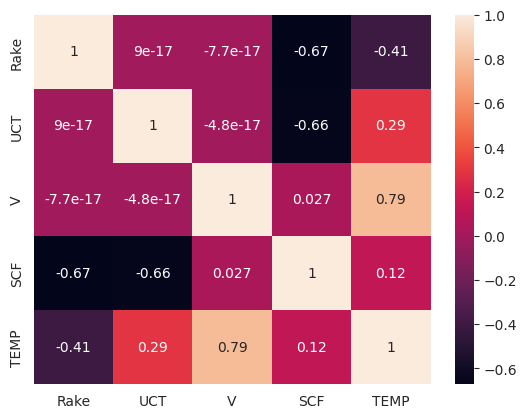

In [ ]:
# Correlation
correlations = df.corr()
sns.heatmap(correlations, annot=True)

The rake aangle and uncut chip thickness has a high negative correlation with the specific cutting force. Also, the cutting speed is highly correlated with max temperature. On the other hand, the cutting speed does not have a good correlation with the specific cutting force. The cutting force is also weakly correlated with the max temperature.

In [127]:
# dividing the dataset to the input variables and output variables
x = df.iloc[:,0:-2]
y= df.iloc[:,-2:]

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=190)

In [129]:
# Normalization
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [130]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

# ANN Architectures

Shallow and Narrow Network

In [131]:
# model_1 - Shallow and narrow network
# model_2 - Shallow and wide network
# model_3 - Deep and wide network
# model_4 - Deep and narrow network

In [132]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'relu'))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 8)                 32        
                                                                 
 dense_146 (Dense)           (None, 8)                 72        
                                                                 
 dense_147 (Dense)           (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


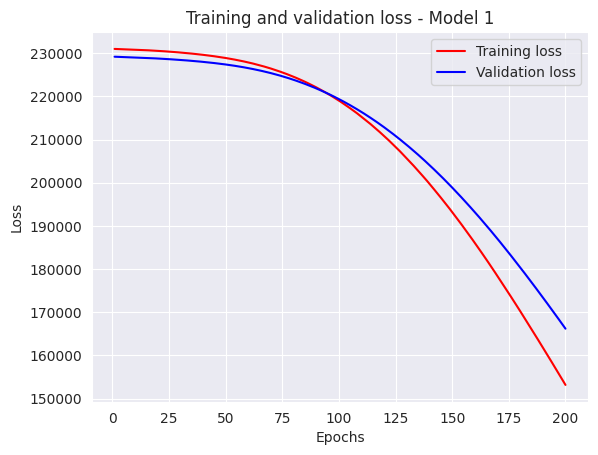

In [133]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [134]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 55ms/step
Predicted values are:  [[ 95.85098   96.01374 ]
 [116.5105   116.90045 ]
 [105.56344  105.003235]
 [ 75.24576   74.7436  ]
 [ 50.891846  50.44689 ]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Shallow and wide

In [135]:
model_2 = Sequential()
model_2.add(Dense(512, input_dim=3, activation = 'relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 512)               2048      
                                                                 
 dense_149 (Dense)           (None, 256)               131328    
                                                                 
 dense_150 (Dense)           (None, 2)                 514       
                                                                 
Total params: 133,890
Trainable params: 133,890
Non-trainable params: 0
_________________________________________________________________


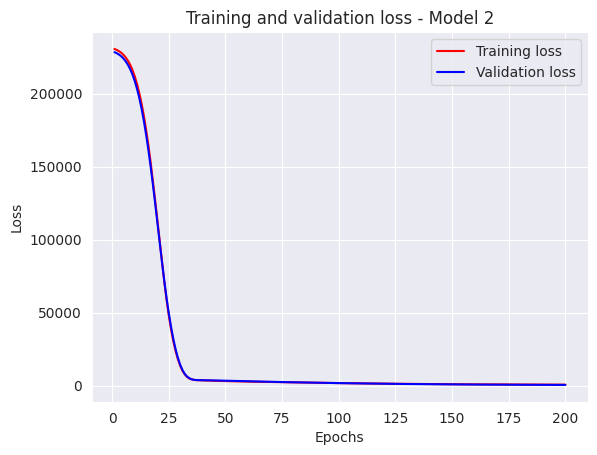

In [136]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [137]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 53ms/step
Predicted values are:  [[713.565   233.34346]
 [708.3785  237.97067]
 [585.96246 238.82634]
 [741.3427  214.33482]
 [905.7148  225.72623]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and wide

In [138]:
model_3 = Sequential()
model_3.add(Dense(512, input_dim=3, activation='relu'))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 512)               2048      
                                                                 
 dense_152 (Dense)           (None, 256)               131328    
                                                                 
 dense_153 (Dense)           (None, 128)               32896     
                                                                 
 dense_154 (Dense)           (None, 128)               16512     
                                                                 
 dense_155 (Dense)           (None, 128)               16512     
                                                                 
 dense_156 (Dense)           (None, 64)                8256      
                                                                 
 dense_157 (Dense)           (None, 64)              

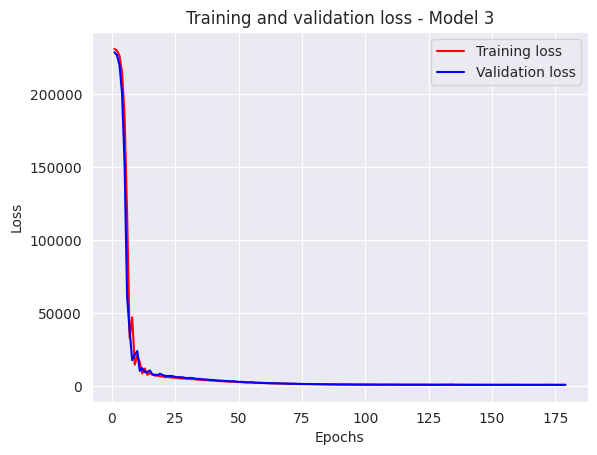

In [139]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [140]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 149ms/step
Predicted values are: 
 [[707.85266 224.31952]
 [694.32263 220.10202]
 [579.97565 184.15825]
 [741.2403  234.68863]
 [860.8942  272.33533]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and Narrow Network

In [141]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 8)                 32        
                                                                 
 dense_160 (Dense)           (None, 8)                 72        
                                                                 
 dense_161 (Dense)           (None, 8)                 72        
                                                                 
 dense_162 (Dense)           (None, 8)                 72        
                                                                 
 dense_163 (Dense)           (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


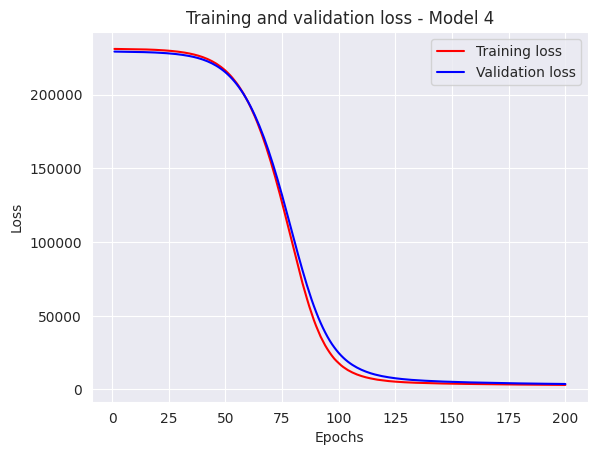

In [142]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 69ms/step
Predicted values are: 
 [[748.0888  237.22162]
 [772.0903  244.19987]
 [514.03613 162.87885]
 [669.4045  212.46948]
 [772.82996 245.28096]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Finding the optimal ANN architecture

In [144]:
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from Model 1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 7ms/step - loss: 3092.7104 - mae: 44.6009

Mean squared error and Mean absolute error from Model 1 is  200253.578 and  363.672 respectively

Mean squared error and Mean absolute error from Model 2 is  813.834 and  21.053 respectively

Mean squared error and Mean absolute error from Model 3 is  1322.334 and  26.802 respectively

Mean squared error and Mean absolute error from Model 4 is  3092.710 and  44.601 respectively


Optimal ANN architecture is the Shallow and Wide Network because it has the least mean absolute error.

# Changing the activation function

In [145]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'tanh'))
model_1.add(Dense(8, activation = 'tanh'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 8)                 32        
                                                                 
 dense_165 (Dense)           (None, 8)                 72        
                                                                 
 dense_166 (Dense)           (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


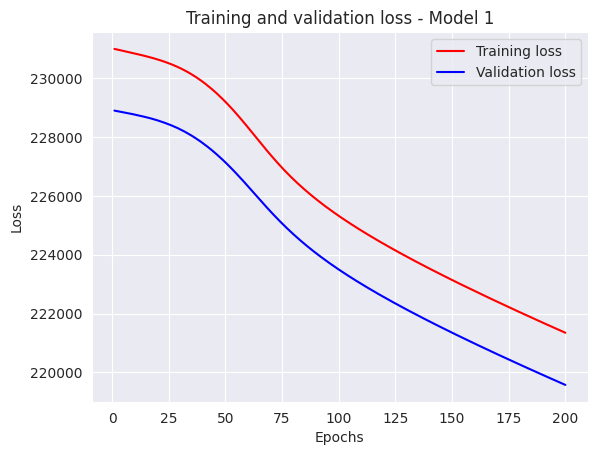

In [146]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 53ms/step
Predicted values are:  [[12.196436  9.564568]
 [12.182207  9.552769]
 [12.197622  9.563534]
 [12.200156  9.56625 ]
 [12.193209  9.559601]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [148]:
# MODEL 2
model_2 = Sequential()
model_2.add(Dense(512, input_dim=3, activation = 'tanh'))
model_2.add(Dense(256, activation='tanh'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 512)               2048      
                                                                 
 dense_168 (Dense)           (None, 256)               131328    
                                                                 
 dense_169 (Dense)           (None, 2)                 514       
                                                                 
Total params: 133,890
Trainable params: 133,890
Non-trainable params: 0
_________________________________________________________________


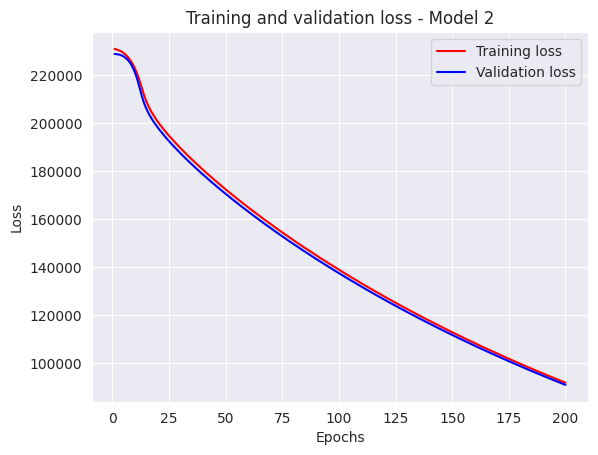

In [149]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [150]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 55ms/step
Predicted values are:  [[226.40063 167.83156]
 [226.39737 167.82907]
 [226.39825 167.82985]
 [226.40094 167.83174]
 [226.39941 167.8304 ]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [151]:
# MODEL 3
model_3 = Sequential()
model_3.add(Dense(512, input_dim=3, activation='tanh'))
model_3.add(Dense(256, activation='tanh'))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 512)               2048      
                                                                 
 dense_171 (Dense)           (None, 256)               131328    
                                                                 
 dense_172 (Dense)           (None, 128)               32896     
                                                                 
 dense_173 (Dense)           (None, 128)               16512     
                                                                 
 dense_174 (Dense)           (None, 128)               16512     
                                                                 
 dense_175 (Dense)           (None, 64)                8256      
                                                                 
 dense_176 (Dense)           (None, 64)              

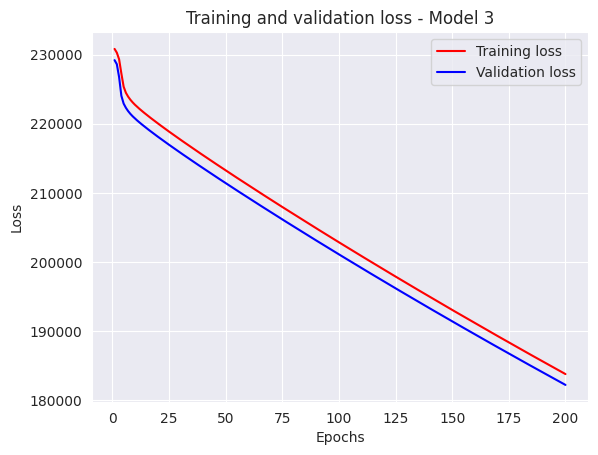

In [152]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [153]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 110ms/step
Predicted values are: 
 [[62.17072  52.96869 ]
 [62.170715 52.96869 ]
 [62.170715 52.968685]
 [62.170715 52.96869 ]
 [62.17072  52.96869 ]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [154]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 8)                 32        
                                                                 
 dense_179 (Dense)           (None, 8)                 72        
                                                                 
 dense_180 (Dense)           (None, 8)                 72        
                                                                 
 dense_181 (Dense)           (None, 8)                 72        
                                                                 
 dense_182 (Dense)           (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


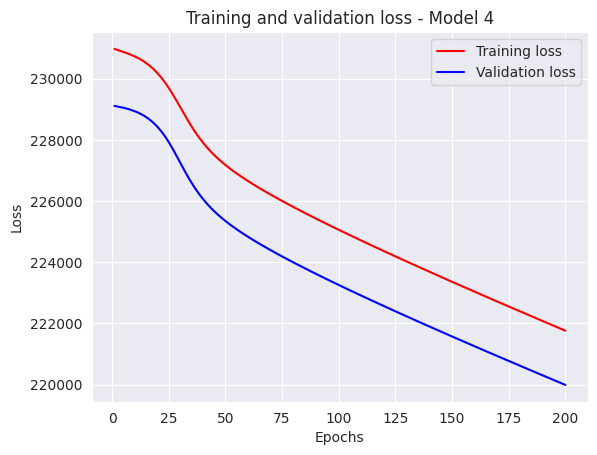

In [155]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [156]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 81ms/step
Predicted values are: 
 [[11.549294  9.462894]
 [11.547359  9.461366]
 [11.549278  9.462892]
 [11.550276  9.46366 ]
 [11.546497  9.460623]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [157]:
# Optimal Architecture using Hyperbolic Tangent Activation Function
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from ANN1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 7ms/step - loss: 263943.2500 - mae: 444.0072

Mean squared error and Mean absolute error from ANN1 is  263482.094 and  443.639 respectively

Mean squared error and Mean absolute error from ANN2 is  120084.812 and  257.985 respectively

Mean squared error and Mean absolute error from ANN3 is  222642.719 and  396.943 respectively

Mean squared error and Mean absolute error from ANN4 is  263943.250 and  444.007 respectively


The optimal ANN architecture when activation function is changed remained the same (Shallow and Wide Network). In addition, the hyperbolic tangent activation function was not ideal in predicting the ouptut and contains large values of mean absolute errors.